<a href="https://colab.research.google.com/github/nendyannisa/Data-Mining-with-Python/blob/main/Tugas_Akhir_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("HousePrices.csv")
x = dataset.iloc[:, [1,2]].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[[ 42000.   5850.]
 [ 38500.   4000.]
 [ 49500.   3060.]
 ...
 [103000.   6000.]
 [105000.   6000.]
 [105000.   6000.]]


In [ ]:
print(y)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)

In [ ]:
print(x_train)

[[ 49500.   2145.]
 [ 49500.   3060.]
 [ 58000.   3000.]
 [ 58900.   6060.]
 [ 61000.   2175.]
 [ 52000.   3000.]
 [ 84000.   6500.]
 [ 75000.   6540.]
 [ 94500.  10500.]
 [ 70000.   5400.]
 [ 46000.   2684.]
 [ 53000.   3584.]
 [ 52000.   4130.]
 [ 66000.   5010.]
 [ 46000.   4370.]
 [ 65500.   3840.]
 [ 61000.   4360.]
 [ 61500.  10360.]
 [ 53000.   4040.]
 [120900.   6000.]
 [ 69000.   6040.]
 [ 64500.   3450.]
 [ 25000.   3850.]
 [ 50500.   3850.]
 [ 51500.   4500.]
 [ 35000.   3000.]
 [ 38000.   4000.]
 [ 38000.   2000.]
 [ 48000.   4750.]
 [ 52000.   3570.]
 [ 71900.   4800.]
 [120000.   7475.]
 [105000.   6000.]
 [ 70000.   2970.]
 [ 47000.   3792.]
 [ 58500.   4040.]
 [ 50000.   3120.]
 [ 34000.   2475.]
 [ 49000.   3185.]
 [ 61000.   4500.]
 [ 55000.   2015.]
 [ 44900.   4500.]
 [ 50000.   3512.]
 [114900.   7482.]
 [112000.   6360.]
 [ 72000.   7600.]
 [110000.   6000.]
 [ 42000.   3150.]
 [ 44000.   4960.]
 [ 56000.   2145.]
 [ 59500.   4046.]
 [ 60000.   2953.]
 [ 54000.   

In [ ]:
print(x_test)

[[ 57000.   6480.]
 [132000.   7800.]
 [ 53900.   8250.]
 [ 44700.   5495.]
 [ 65000.   3760.]
 [ 67000.   5170.]
 [ 67000.   4320.]
 [ 47000.   6060.]
 [ 70000.   6720.]
 [ 42000.   3660.]
 [ 56000.   3000.]
 [ 58550.   3600.]
 [ 60000.   5040.]
 [ 99000.   8880.]
 [ 65000.   2550.]
 [124000.   7155.]
 [ 40000.   3960.]
 [106000.   7440.]
 [ 35000.   7700.]
 [ 52900.   5450.]
 [ 87500.   6420.]
 [155000.   7500.]
 [ 70500.   5948.]
 [ 57000.   3960.]
 [ 80000.   4700.]
 [ 83900.   5500.]
 [ 57500.   3630.]
 [141000.   8100.]
 [ 25000.   2910.]
 [ 51000.   4500.]
 [ 69000.   4815.]
 [ 69900.   4995.]
 [ 46200.   3640.]
 [118500.   4880.]
 [ 75000.   4260.]
 [ 70800.   2800.]
 [ 70000.   4770.]
 [ 27000.   3649.]
 [ 37900.   3185.]
 [ 60000.   2610.]
 [103500.   9000.]
 [ 45000.   6750.]
 [ 40750.   5200.]
 [ 59500.   4080.]
 [ 85000.   6254.]
 [ 75000.  10269.]
 [ 86000.   6800.]
 [ 44000.   2160.]
 [ 70000.  12900.]
 [ 99000.  13200.]
 [ 79500.   5400.]
 [ 54000.   3420.]
 [ 87000.   

In [ ]:
print(y_train)

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 0]


In [ ]:
print(y_test)

[0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-6.70442622e-01 -1.44128307e+00]
 [-6.70442622e-01 -9.81596292e-01]
 [-3.54439361e-01 -1.01173969e+00]
 [-3.20980193e-01  5.25573466e-01]
 [-2.42908799e-01 -1.42621137e+00]
 [-5.77500487e-01 -1.01173969e+00]
 [ 6.12158847e-01  7.46625030e-01]
 [ 2.77567160e-01  7.66720627e-01]
 [ 1.00251582e+00  2.75618471e+00]
 [ 9.16828887e-02  1.93996119e-01]
 [-8.00561612e-01 -1.17049490e+00]
 [-5.40323632e-01 -7.18343975e-01]
 [-5.77500487e-01 -4.44039079e-01]
 [-5.70245280e-02 -1.93594943e-03]
 [-8.00561612e-01 -3.23465498e-01]
 [-7.56129551e-02 -5.89732155e-01]
 [-2.42908799e-01 -3.28489397e-01]
 [-2.24320372e-01  2.68585012e+00]
 [-5.40323632e-01 -4.89254171e-01]
 [ 1.98398477e+00  4.95430071e-01]
 [ 5.45060345e-02  5.15525668e-01]
 [-1.12789809e-01 -7.85664224e-01]
 [-1.58127555e+00 -5.84708256e-01]
 [-6.33265768e-01 -5.84708256e-01]
 [-5.96088914e-01 -2.58154808e-01]
 [-1.20950701e+00 -1.01173969e+00]
 [-1.09797644e+00 -5.09349768e-01]
 [-1.09797644e+00 -1.51412961e+00]
 [-7.26207903e-01 -1

In [ ]:
print(x_test)

[[-3.91616216e-01  7.36577232e-01]
 [ 2.39664785e+00  1.39973193e+00]
 [-5.06864464e-01  1.62580739e+00]
 [-8.48891522e-01  2.41723161e-01]
 [-9.42013822e-02 -6.29923349e-01]
 [-1.98476739e-02  7.84464377e-02]
 [-1.98476739e-02 -3.48584994e-01]
 [-7.63384757e-01  5.25573466e-01]
 [ 9.16828887e-02  8.57150813e-01]
 [-9.49269028e-01 -6.80162341e-01]
 [-4.28793070e-01 -1.01173969e+00]
 [-3.33992092e-01 -7.10305736e-01]
 [-2.80085653e-01  1.31357481e-02]
 [ 1.16981166e+00  1.94231304e+00]
 [-9.42013822e-02 -1.23781515e+00]
 [ 2.09923301e+00  1.07569043e+00]
 [-1.02362274e+00 -5.29445365e-01]
 [ 1.43004964e+00  1.21887155e+00]
 [-1.20950701e+00  1.34949293e+00]
 [-5.44041318e-01  2.19115615e-01]
 [ 7.42277837e-01  7.06433837e-01]
 [ 3.25171549e+00  1.24901495e+00]
 [ 1.10271316e-01  4.69305795e-01]
 [-3.91616216e-01 -5.29445365e-01]
 [ 4.63451430e-01 -1.57676824e-01]
 [ 6.08441162e-01  2.44235111e-01]
 [-3.73027789e-01 -6.95234038e-01]
 [ 2.73123954e+00  1.55044890e+00]
 [-1.58127555e+00 -1

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[189  23]
 [ 42  19]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


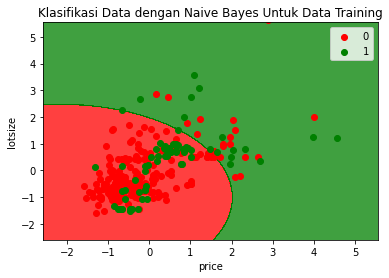

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max() + 1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1,stop = x_set[:,0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red','green'))(i),label=j)
plt.title('Klasifikasi Data dengan Naive Bayes Untuk Data Training')
plt.xlabel('price')
plt.ylabel('lotsize')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


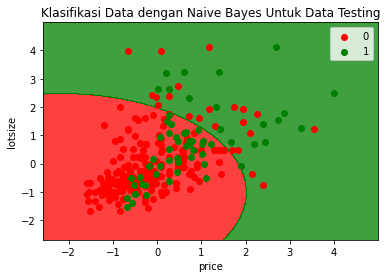

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max() + 1, step=0.01),
                     np.arange(start=x_set[:,1].min()-1,stop = x_set[:,0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red','green'))(i),label=j)
plt.title('Klasifikasi Data dengan Naive Bayes Untuk Data Testing')
plt.xlabel('price')
plt.ylabel('lotsize')
plt.legend()
plt.show()